# 🧪 Task-2 — Exploratory Data Analysis (EDA)
### Saiket Systems — Data Science Internship

This notebook performs a complete Exploratory Data Analysis (EDA) on the **cleaned Telco Customer Churn dataset**.

### 🔍 Objectives
- Understand customer demographics  
- Analyze churn distribution  
- Explore service usage trends  
- Study billing & contract patterns  
- Analyze tenure behavior  
- Identify key churn drivers using correlation  


In [26]:
# ======================
# 1 — IMPORTS & SETTINGS
# ======================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option("display.max_columns", 200)


## 📂 2 — Load Cleaned Dataset
We load the cleaned dataset produced from Task-1.


In [27]:
df = pd.read_csv("dataset/Telco_Customer_Churn_Dataset_cleaned.csv")

print("Shape:", df.shape)
df.head()

Shape: (7043, 32)


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,0,34,56.95,1889.50,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
2,3668-QPYBK,0,2,53.85,108.15,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
3,7795-CFOCW,0,45,42.30,1840.75,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False
4,9237-HQITU,0,2,70.70,151.65,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True


## 📊 3 — Dataset Overview
We examine datatypes, missing values, and summary statistics.


In [28]:
df.info()
df.describe().T
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   tenure                                 7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7043 non-null   float64
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

customerID                               0
SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

# 📉 4 — Churn Distribution
Understanding churn distribution is the most important part of this project.


In [29]:
# Counts
print(df['Churn_Yes'].value_counts())

# Churn rate
churn_rate = df['Churn_Yes'].mean() * 100
print("\nOverall Churn Rate: {:.2f}%".format(churn_rate))

Churn_Yes
False    5174
True     1869
Name: count, dtype: int64

Overall Churn Rate: 26.54%


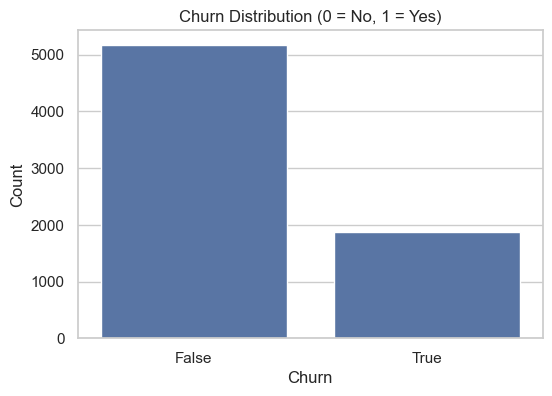

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Churn_Yes'])
plt.title("Churn Distribution (0 = No, 1 = Yes)")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

### 📝 Observation:
- The dataset is moderately imbalanced.
- Around **26–27% customers have churned**, which is typical for telecom datasets.


# 🧍‍♂️ 5 — Demographic Analysis
We analyze how demographic factors relate to churn.


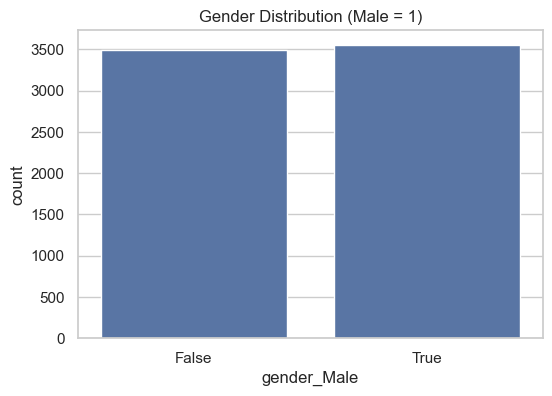

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['gender_Male'])
plt.title("Gender Distribution (Male = 1)")
plt.show()


**Observation:**  
Gender is almost evenly split, so gender is not expected to be a strong churn factor.


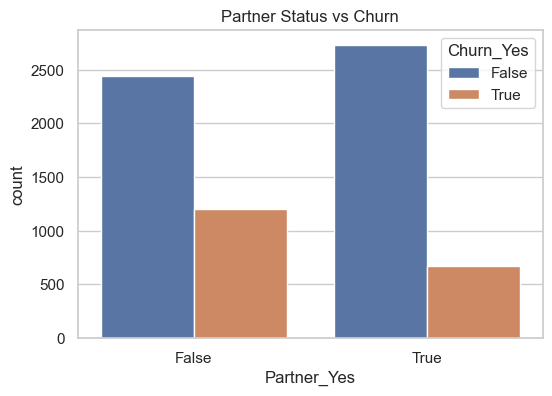

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Partner_Yes'], hue=df['Churn_Yes'])
plt.title("Partner Status vs Churn")
plt.show()

**Observation:**  
Customers with **no partner** have a significantly higher churn rate.


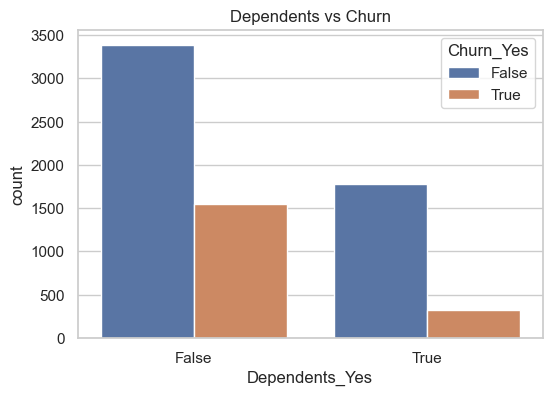

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Dependents_Yes'], hue=df['Churn_Yes'])
plt.title("Dependents vs Churn")
plt.show()


**Observation:**  
Customers **without dependents** churn more.  
This indicates single or younger customers are at higher churn risk.


# ⏳ 6 — Tenure Insights
Tenure strongly influences churn; new customers churn more.


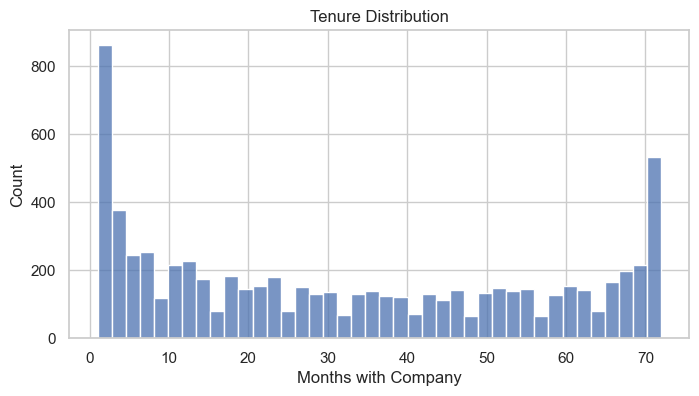

In [34]:
plt.figure(figsize=(8,4))
sns.histplot(df['tenure'], bins=40)
plt.title("Tenure Distribution")
plt.xlabel("Months with Company")
plt.show()


**Observation:**  
Many customers are new (< 12 months), which is a known churn-prone group.


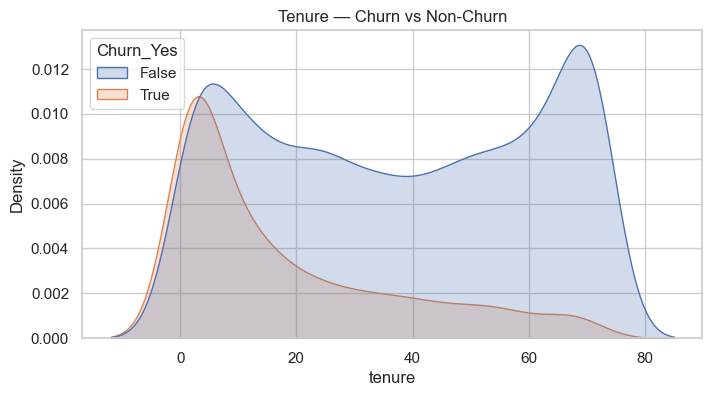

In [35]:
plt.figure(figsize=(8,4))
sns.kdeplot(data=df, x="tenure", hue="Churn_Yes", fill=True)
plt.title("Tenure — Churn vs Non-Churn")
plt.show()


**Observation:**
- Churners mostly have **low tenure**.
- Long-term customers rarely churn.


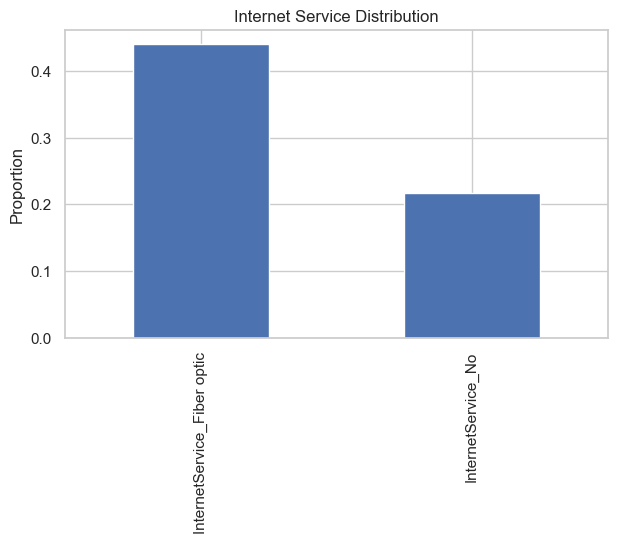

In [36]:
service_cols = [
    'InternetService_Fiber optic',
    'InternetService_No'
]

df[service_cols].mean().plot(kind='bar', figsize=(7,4))
plt.title("Internet Service Distribution")
plt.ylabel("Proportion")
plt.show()


**Observation:**  
- A large portion uses **Fiber Optic**, which correlates with higher churn.


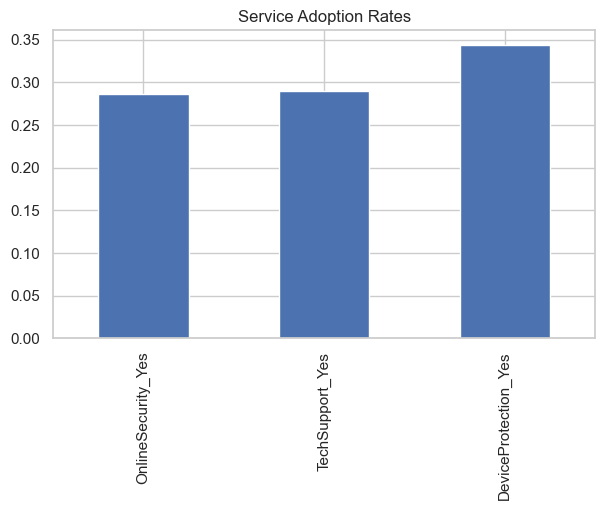

In [37]:
support_cols = [
    'OnlineSecurity_Yes',
    'TechSupport_Yes',
    'DeviceProtection_Yes'
]

df[support_cols].mean().plot(kind='bar', figsize=(7,4))
plt.title("Service Adoption Rates")
plt.show()


**Observation:**  
Important insight:  
**Customers without security or tech support services churn more.**


# 📄 8 — Contract & Billing Analysis
Contract duration and payment method are major churn drivers.


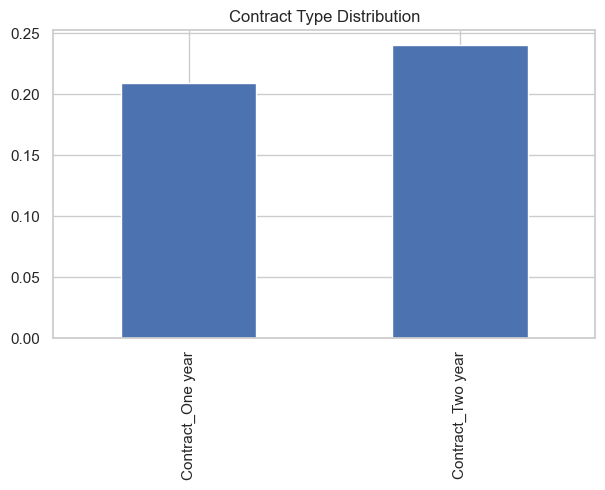

In [38]:
contract_cols = [
    "Contract_One year",
    "Contract_Two year"
]

df[contract_cols].mean().plot(kind='bar', figsize=(7,4))
plt.title("Contract Type Distribution")
plt.show()


In [39]:
for col in contract_cols:
    print(f"\nChurn rate for {col}:")
    print(df.groupby(col)['Churn_Yes'].mean())



Churn rate for Contract_One year:
Contract_One year
False    0.305745
True     0.112695
Name: Churn_Yes, dtype: float64

Churn rate for Contract_Two year:
Contract_Two year
False    0.340501
True     0.028319
Name: Churn_Yes, dtype: float64


**Observation:**  
- **Month-to-month customers churn the most.**  
- 1-year & 2-year contracts show very low churn.


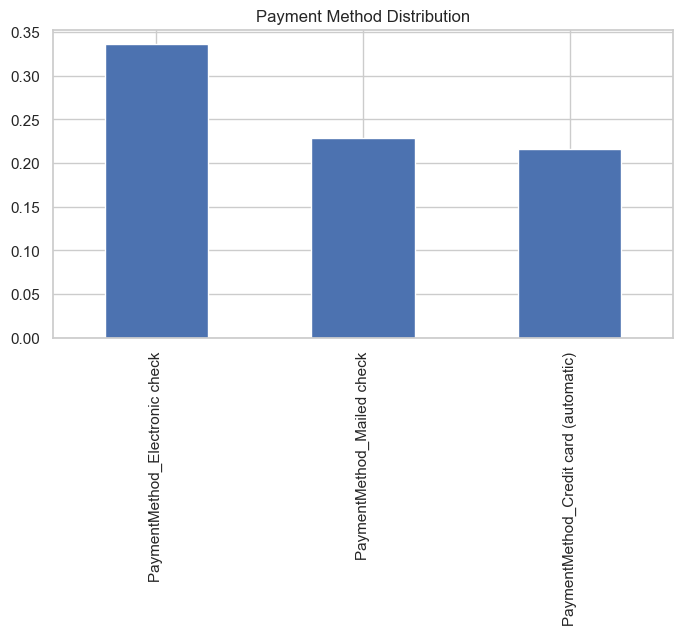

In [40]:
pay_cols = [
    "PaymentMethod_Electronic check",
    "PaymentMethod_Mailed check",
    "PaymentMethod_Credit card (automatic)"
]

df[pay_cols].mean().plot(kind='bar', figsize=(8,4))
plt.title("Payment Method Distribution")
plt.show()


In [41]:
for col in pay_cols:
    print(f"\nChurn rate for {col}:")
    print(df.groupby(col)['Churn_Yes'].mean())



Churn rate for PaymentMethod_Electronic check:
PaymentMethod_Electronic check
False    0.170586
True     0.452854
Name: Churn_Yes, dtype: float64

Churn rate for PaymentMethod_Mailed check:
PaymentMethod_Mailed check
False    0.287424
True     0.191067
Name: Churn_Yes, dtype: float64

Churn rate for PaymentMethod_Credit card (automatic):
PaymentMethod_Credit card (automatic)
False    0.296504
True     0.152431
Name: Churn_Yes, dtype: float64


**Observation:**  
Customers using **Electronic Check** have the **highest churn**.


# 🔥 9 — Numerical Feature Analysis
We analyze billing and cost-related features.


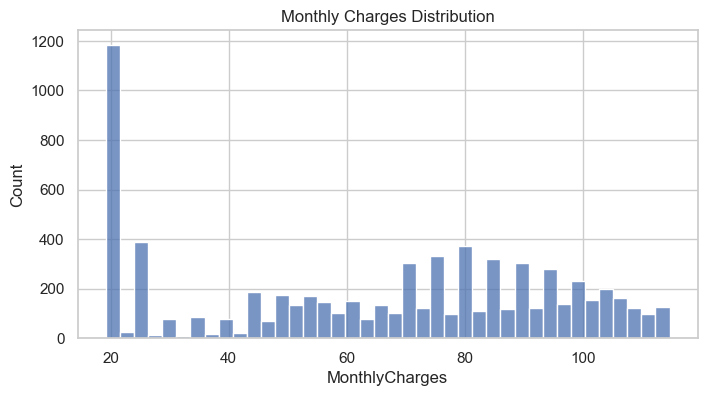

In [42]:
plt.figure(figsize=(8,4))
sns.histplot(df['MonthlyCharges'], bins=40)
plt.title("Monthly Charges Distribution")
plt.show()


**Observation:**  
High-paying customers churn more, likely due to bill shock.


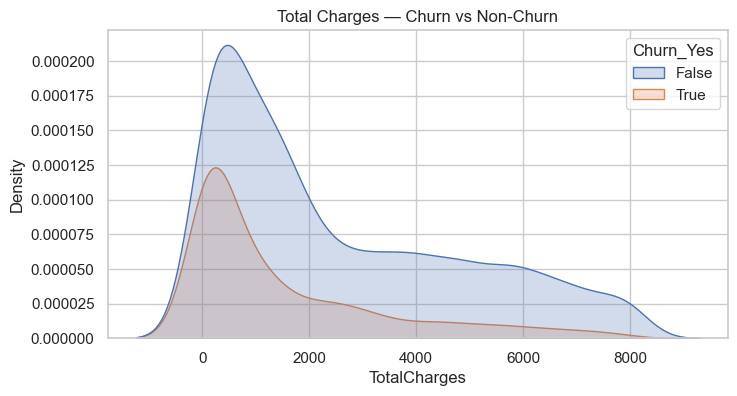

In [43]:
plt.figure(figsize=(8,4))
sns.kdeplot(data=df, x='TotalCharges', hue='Churn_Yes', fill=True)
plt.title("Total Charges — Churn vs Non-Churn")
plt.show()


**Observation:**  
Churners usually have **low total charges**, meaning **they are new customers**.


# 🔗 10 — Correlation Heatmap
Shows how features relate to each other and churn.


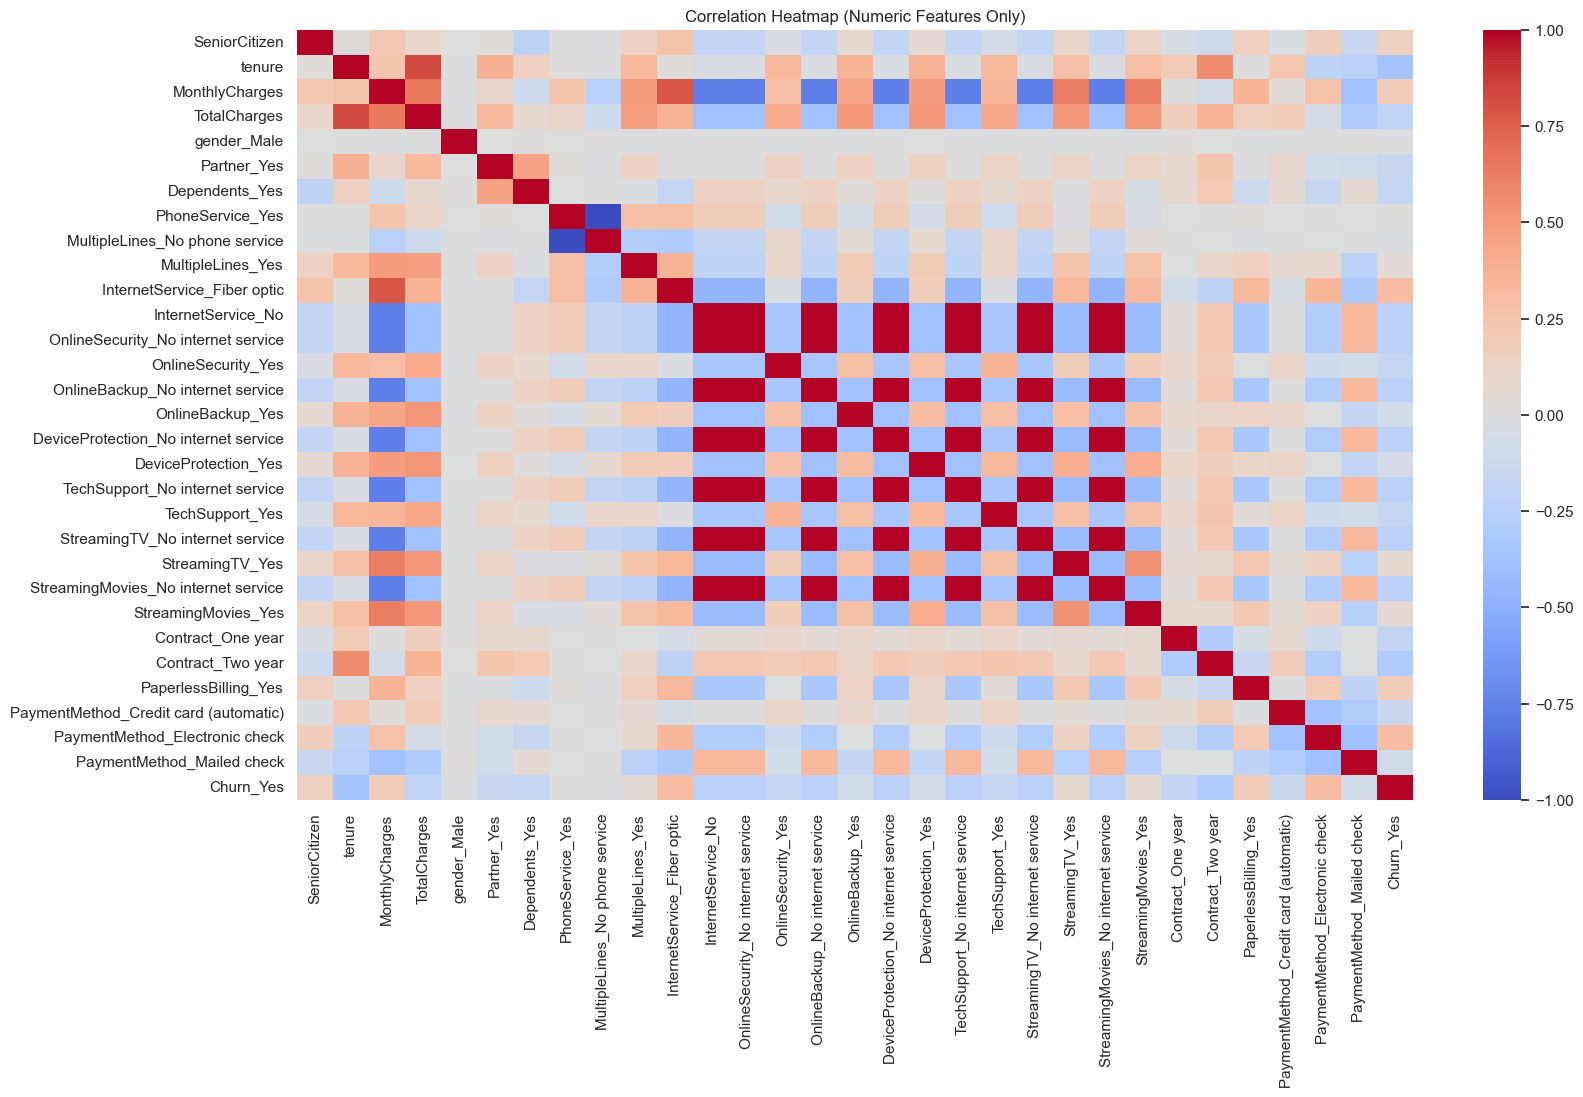

In [44]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64', 'bool'])

plt.figure(figsize=(18, 10))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


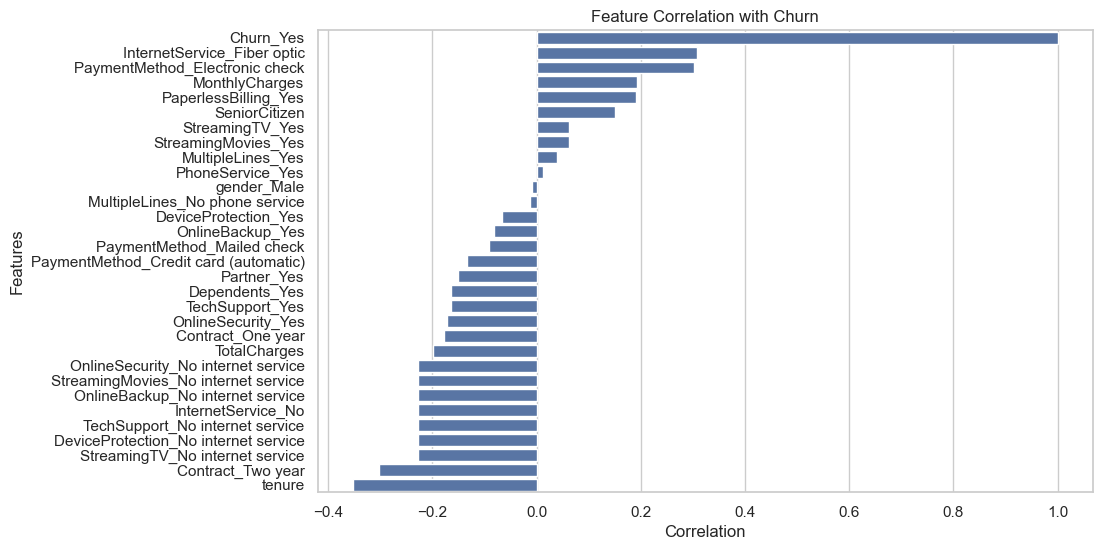

In [45]:
plt.figure(figsize=(10,6))
churn_corr = numeric_df.corr()['Churn_Yes'].sort_values(ascending=False)

sns.barplot(x=churn_corr.values, y=churn_corr.index)
plt.title("Feature Correlation with Churn")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.show()


# 📝 11 — EDA Summary Report

Below are the key insights and major churn drivers identified from the exploratory data analysis.


## 🔍 Key Churn Drivers Identified

### 1️⃣ Tenure (New Customers)
- Customers in their **first 6–12 months** show the highest churn.
- Churn rate drops for long-term customers.

### 2️⃣ Contract Type
- **Month-to-Month** contracts have the highest churn.
- **One-year and two-year** contracts significantly reduce churn.

### 3️⃣ Payment Method
- **Electronic Check** users show extremely high churn.
- Credit card & bank transfer users churn less.

### 4️⃣ Internet Service Type
- **Fiber Optic** users churn more compared to DSL users.

### 5️⃣ Lack of Add-on Services
Customers without:
- Online security  
- Tech support  
- Device protection  
…have noticeably higher churn.

---

## 🔥 High-Risk Customer Segments

These customers are most likely to leave:

- **Month-to-month + Electronic Check**
- **Fiber Optic + No online security**
- **Tenure < 12 months**
- **Customers paying higher monthly charges**
- **Senior citizens without partner/dependents**

These insights will guide segmentation (Task-3) and model building (Task-4).


# 🎉 ✅ TASK-2 COMPLETED — Exploratory Data Analysis

EDA for the Telco Customer Churn dataset is complete.  

This EDA will help prepare for:
- **Task-3: Customer Segmentation**
- **Task-4: Churn Prediction Model**

